Importar librerías necesarias

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import spacy

# Cargar modelo de idioma de spaCy
nlp = spacy.load("en_core_web_sm")

Cargar los datos

In [61]:
df = pd.read_csv("../data/youtube_cln_proc.csv", index_col = False)
df.head(2)

,IsToxic,processed_text
0,False,people step case not people situation lump mes...
1,True,law enforcement train shoot apprehend train sh...


### Vectorización de Texto con TF-IDF

Convertir el texto preprocesado en una representación numérica usando TF-IDF

In [62]:
# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Definir la variable objetivo (target)
y = df['IsToxic']  

print(f"X: {X}\n" )
print(f"y: {y}\n" )

X: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13300 stored elements and shape (999, 3513)>
  Coords	Values
  (0, 2274)	0.23069603510185147
  (0, 2970)	0.09905478481290517
  (0, 446)	0.07603367867551696
  (0, 2133)	0.044179447885470444
  (0, 2844)	0.08348201619357815
  (0, 1858)	0.12261547420222314
  (0, 1945)	0.10132421023479603
  (0, 1913)	0.07257342385593203
  (0, 1375)	0.07603367867551696
  (0, 1879)	0.07659095630163322
  (0, 1725)	0.09905478481290517
  (0, 2443)	0.14174492190706622
  (0, 2760)	0.11572441431027822
  (0, 2528)	0.10704270558289614
  (0, 3145)	0.11572441431027822
  (0, 1639)	0.11083512950756415
  (0, 1361)	0.06293519728474464
  (0, 3351)	0.06194967804413073
  (0, 1405)	0.12261547420222314
  (0, 983)	0.12261547420222314
  (0, 1504)	0.12261547420222314
  (0, 3382)	0.06757269311373901
  (0, 1402)	0.1669640323871563
  (0, 1293)	0.06171197563969731
  (0, 2392)	0.10704270558289614
  :	:
  (995, 3208)	0.20834700241988574
  (995, 295)	0.22160478995213273
  (

Dividir los datos en conjuntos de entrenamiento y prueba

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Crear y entrenar el modelo de regresión logística

In [64]:
model = LogisticRegression(
    C=1.0,                    # Factor de regularización
    class_weight='balanced',  # Para manejar desbalance de clases
    random_state=42,
    max_iter=1000
)

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Evaluación y Detección de Overfitting

Comprobar el rendimiento del modelo en los conjuntos de entrenamiento y prueba.

In [65]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overfitting = train_accuracy - test_accuracy

# Imprimir resultados
print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_test_pred))

Accuracy en entrenamiento: 94.49%
Accuracy en prueba: 70.50%
Overfitting: 23.99%

Reporte de clasificación detallado:
              precision    recall  f1-score   support

       False       0.70      0.74      0.72       102
        True       0.71      0.67      0.69        98

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



### Evaluación Adicional y Reducción del Overfitting

Usar validación cruzada y, en caso de overfitting alto, podemos aplicar técnicas de ajuste como selección de características o regularización.

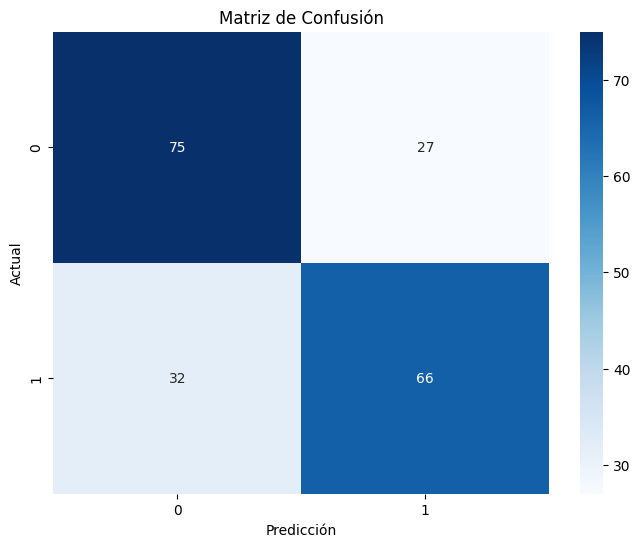

              precision    recall  f1-score   support

       False       0.70      0.74      0.72       102
        True       0.71      0.67      0.69        98

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [ ]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

In [66]:
# Validación cruzada para evaluar el modelo y reducir overfitting
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Promedio de Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy Scores: [0.69       0.715      0.695      0.685      0.64321608]
Promedio de Cross-Validation Accuracy: 68.56%


### Matriz de Confusión y Reporte de Clasificación

Para entender mejor el rendimiento del modelo, visualizamos la matriz de confusión.

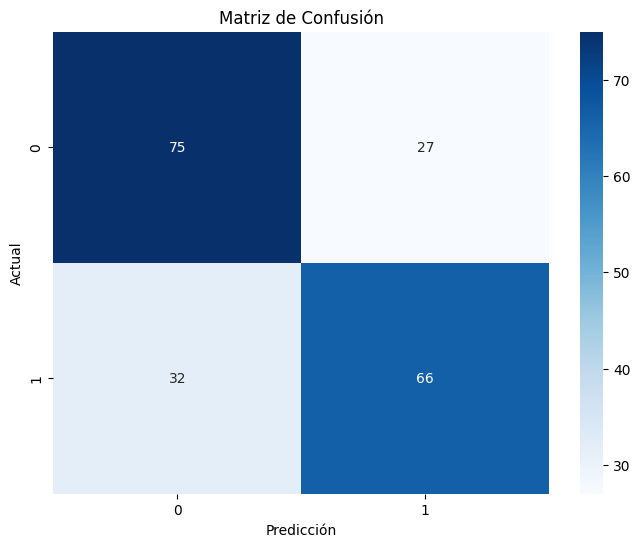

              precision    recall  f1-score   support

       False       0.70      0.74      0.72       102
        True       0.71      0.67      0.69        98

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [67]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

## Reducción del Overfitting

Técnica de reducción de la dimensionalidad

In [68]:
# Reducimos el número de características manteniendo los términos más informativos
vectorizer = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7)  # 500 es un número sugerido, puedes ajustarlo
X_reduced = vectorizer.fit_transform(df['processed_text'])

# Volvemos a dividir el conjunto reducido en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Entrenar modelo con Regularización

In [69]:
model = LogisticRegression(
        C=0.5,                 # Aumentar regularización
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )
    
model.fit(X_train, y_train)

# Recalcular métricas
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overfitting = train_accuracy - test_accuracy

print(f"\nNuevos resultados:")
print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%n:")
print(classification_report(y_test, y_test_pred))


Nuevos resultados:
Accuracy en entrenamiento: 84.73%
Accuracy en prueba: 70.50%
Overfitting: 14.23%n:
              precision    recall  f1-score   support

       False       0.71      0.72      0.71       102
        True       0.70      0.69      0.70        98

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



#### 3. Validación Cruzada

Realizamos validación cruzada para evaluar el nuevo modelo y confirmar que el overfitting está bajo control.

In [70]:
cv_scores = cross_val_score(model, X_reduced, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Promedio de Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy Scores: [0.66       0.68       0.745      0.67       0.65829146]
Promedio de Cross-Validation Accuracy: 68.27%


#### 4. Matriz de confusión

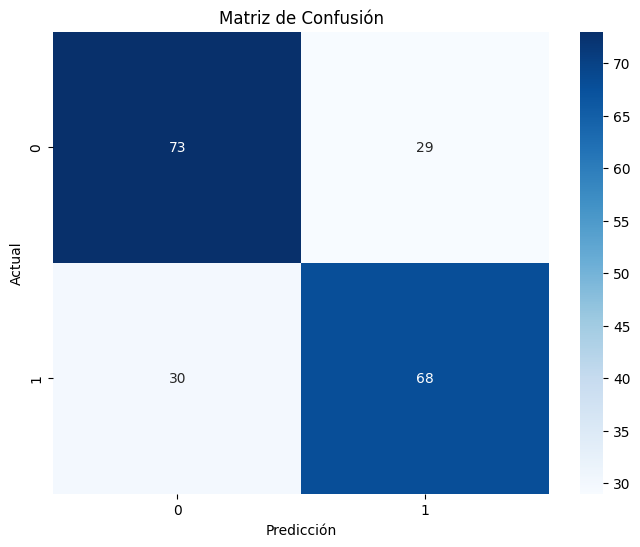

              precision    recall  f1-score   support

       False       0.71      0.72      0.71       102
        True       0.70      0.69      0.70        98

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [71]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Ajustar los Hiperparámetros del Modelo

In [72]:
# Primero, hacer el split con los datos sin vectorizar
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],  # ← Usa el texto procesado sin vectorizar
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [73]:
# Crear pipeline incluyendo TANTO el vectorizador como el clasificador
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # ← Añade el vectorizador al pipeline
    ('clf', LogisticRegression(random_state=42, max_iter=2000))
])

In [82]:
# Definir grid de hiperparámetros
param_grid = {
    'tfidf__max_features': [500, 1000, 1500],  # ← Añade el prefijo 'tfidf__'
    'tfidf__ngram_range': [(1,1), (1,2)],      # ← Añade el prefijo 'tfidf__'
    'tfidf__min_df': [2, 3, 5],                # ← Añade el prefijo 'tfidf__'
    'clf__C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'clf__class_weight': ['balanced'],
}

In [75]:
# Crear y ejecutar GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [76]:
# Ajustar el modelo
print("Iniciando búsqueda de mejores hiperparámetros...")
grid_search.fit(X_train, y_train)


Iniciando búsqueda de mejores hiperparámetros...
Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'clf__class_weight': ['balanced'],
                         'tfidf__max_features': [500, 1000, 1500],
                         'tfidf__min_df': [2, 3, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [77]:

# Obtener y mostrar los mejores parámetros
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)


Mejores parámetros encontrados:
{'clf__C': 1.0, 'clf__class_weight': 'balanced', 'tfidf__max_features': 500, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}


Crear y entrenar el modelo con los mejores hiperparámetros

In [78]:
# Crear modelo final con los mejores parámetros
best_tfidf = TfidfVectorizer(
    max_features=grid_search.best_params_['tfidf__max_features'],
    ngram_range=grid_search.best_params_['tfidf__ngram_range'],
    min_df=grid_search.best_params_['tfidf__min_df']
)

best_model = LogisticRegression(
    C=grid_search.best_params_['clf__C'],
    class_weight=grid_search.best_params_['clf__class_weight'],
    random_state=42,
    max_iter=2000
)

In [79]:
# Entrenar modelo final
X_train_vectorized = best_tfidf.fit_transform(X_train)
X_test_vectorized = best_tfidf.transform(X_test)
best_model.fit(X_train_vectorized, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

Evaluar el modelo

In [80]:
#  Evaluar resultados
y_train_pred = best_model.predict(X_train_vectorized)
y_test_pred = best_model.predict(X_test_vectorized)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
overfitting = train_accuracy - test_accuracy

print("\nResultados finales:")
print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_test_pred))


Resultados finales:
Accuracy en entrenamiento: 85.48%
Accuracy en prueba: 68.50%
Overfitting: 16.98%

Reporte de clasificación detallado:
              precision    recall  f1-score   support

       False       0.71      0.70      0.71       108
        True       0.66      0.66      0.66        92

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



Reducir overfitting del modelo con mejores parámetros

In [81]:
# Si aún hay overfitting, ajustar más agresivamente
if overfitting > 0.05:
    print("\nAplicando ajustes adicionales para reducir overfitting...")
    
    # Crear vectorizador más restrictivo
    final_tfidf = TfidfVectorizer(
        max_features=min(300, grid_search.best_params_['tfidf__max_features']),
        ngram_range=(1,1),  # Solo unigramas
        min_df=max(5, grid_search.best_params_['tfidf__min_df']),
        max_df=0.7  # Ignorar términos que aparecen en más del 70% de los documentos
    )
    
    # Crear modelo más regularizado
    final_model = LogisticRegression(
        C=min(0.1, grid_search.best_params_['clf__C']),  # Aumentar regularización
        class_weight='balanced',
        random_state=42,
        max_iter=2000
    )
    
    # Entrenar modelo final
    X_train_vectorized = final_tfidf.fit_transform(X_train)
    X_test_vectorized = final_tfidf.transform(X_test)
    final_model.fit(X_train_vectorized, y_train)
    
    # Evaluar resultados finales
    y_train_pred = final_model.predict(X_train_vectorized)
    y_test_pred = final_model.predict(X_test_vectorized)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overfitting = train_accuracy - test_accuracy
    
    print("\nResultados con ajustes adicionales:")
    print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
    print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
    print(f"Overfitting: {overfitting * 100:.2f}%")
    print("\nReporte de clasificación final:")
    print(classification_report(y_test, y_test_pred))


Aplicando ajustes adicionales para reducir overfitting...

Resultados con ajustes adicionales:
Accuracy en entrenamiento: 79.60%
Accuracy en prueba: 68.50%
Overfitting: 11.10%

Reporte de clasificación final:
              precision    recall  f1-score   support

       False       0.71      0.70      0.71       108
        True       0.66      0.66      0.66        92

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200

